<img src="../logo_UTN.svg" align="right" width="200" /> 

# Tarea semanal 2
## Manuel Dieguez

En esta tarea vamos a realizar nuestra propia DFT, y vamos a testearla con nuestro generador de senales y una senal aleatoria.

Luego, compararemos los resultados con la FFT de la libreria Numpy

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from signal_generator import *

In [2]:
def DFT(x):
    N = len(x)
    
    n = np.arange(N)
    k = n.reshape(N,1)
    ## Pensamos en los twiddle factors de forma matricial, donde 
    ## cada fila tiene su k constante (correspondiense al k bin) y varia su n, para
    ## multiplicarlo por el vector senal
    W = np.exp(-2j*np.pi*k*n/N)
    Xf = np.dot(W,x)
    
    return Xf

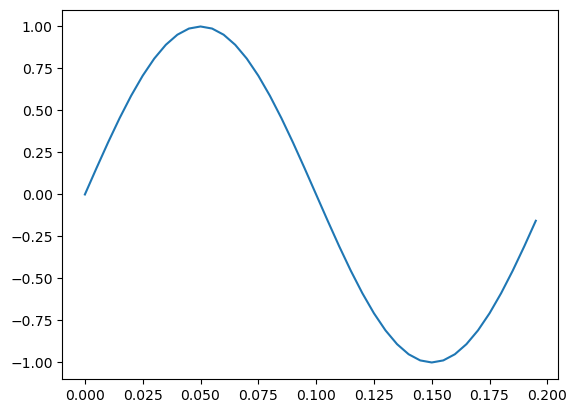

In [3]:
Vp = 1          # Valor pico de la senal
Vdc = 0         # Valor medio de la senal
fs = 200        # Frecuencia de sampleo
f = 5           # Frecuencia de la senal
N = int(fs/f)   # Numero de muestras, resolucion espectral igual a f
fase = 0        # Fase de la senal


[t,x] = signal_gen(Vp, Vdc, f, fase, N, fs)
plt.plot(t,x)

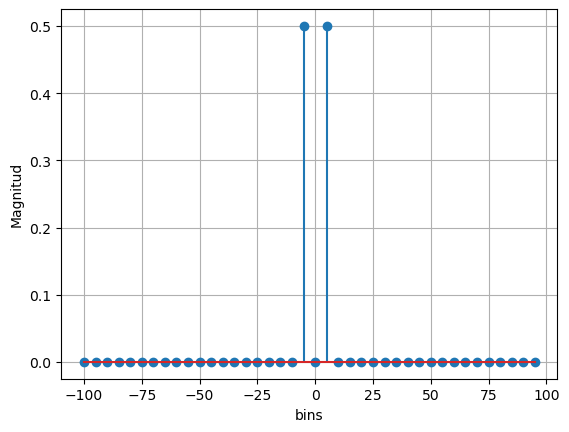

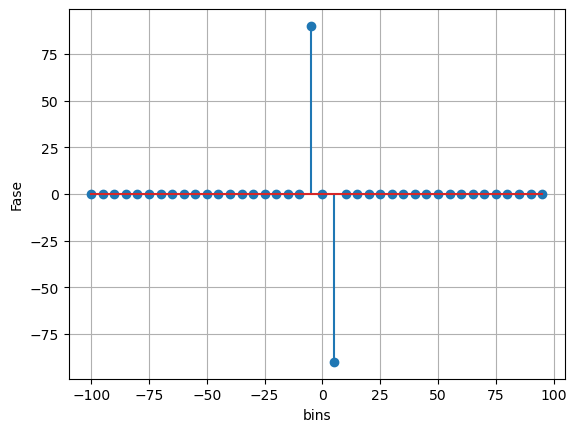

In [4]:
## Hacemos la primer prueba de nuestra DFT con nuestra senoidal

Xf = DFT(x)
Xf_n = Xf/N
## Acomodamos las muestras para centrar en f=0
Xf_n = np.fft.fftshift(Xf_n)
## Creamos el vector de frecuencias ordenado, uso estas funciones por simplicidad
## y ahorrarme el chequeo de si N es par o impar
Xf_freqs = np.fft.fftfreq(N,1/fs)
Xf_freqs = np.fft.fftshift(Xf_freqs)

plt.figure(1)
plt.stem(Xf_freqs,abs(Xf_n))
plt.xlabel("bins")
plt.ylabel("Magnitud")
plt.grid()

## NOTA: Para valores de magnitud chica (error numerico computacional) o incluso valores de 0, las funciones de Python asignan pi o 0 segun el signo
## de su parte real o imaginario, como se ve feo en el grafico, a valores de magnitud chica les asigno fase cero
## arbitrariamente.
angles = np.angle(Xf_n)
angles[abs(Xf_n) < 1e-10] = 0  # Boolean indexing, propio de los ndarray
plt.figure(2)
plt.stem(Xf_freqs,angles*180/np.pi)
plt.xlabel("bins")
plt.ylabel("Fase")
plt.grid()


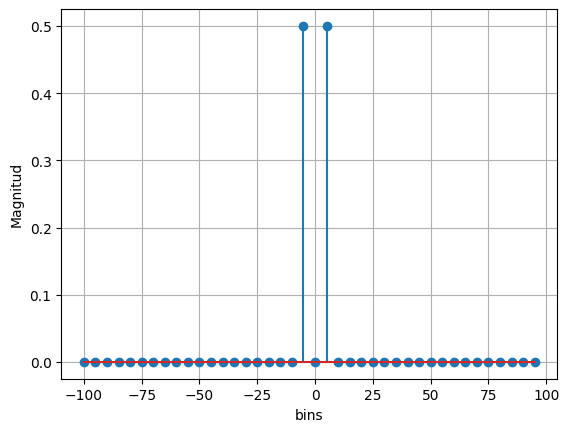

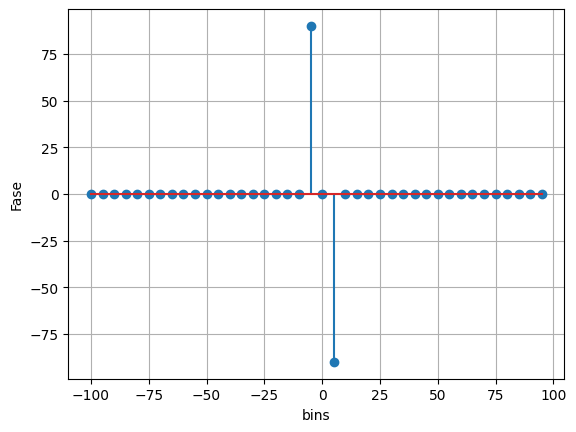

In [7]:
## Repetimos la experiencia con la FFT

Xf_fft = np.fft.fft(x)
Xf_fft_n = Xf_fft/N
## Acomodamos las muestras para centrar en f=0
Xf_fft_n = np.fft.fftshift(Xf_fft_n)
## Creamos el vector de frecuencias ordenado, uso estas funciones por simplicidad
## y ahorrarme el cheque de si N es par o impar
Xf_fft_freqs = np.fft.fftfreq(N,1/fs)
Xf_fft_freqs = np.fft.fftshift(Xf_fft_freqs)
plt.figure(3)
plt.stem(Xf_fft_freqs,abs(Xf_fft_n))
plt.xlabel("bins")
plt.ylabel("Magnitud")
plt.grid()

angles = np.angle(Xf_fft_n)
angles[abs(Xf_fft_n) < 1e-10] = 0  # Boolean indexing, propio de los ndarray
plt.figure(4)
plt.stem(Xf_fft_freqs,angles*180/np.pi)
plt.xlabel("bins")
plt.ylabel("Fase")
plt.grid()

Vamos que ambos resultados son identicos y vemos el clasico espectro de la senoidal.

Ahora vamos a realizar la misma experiecia pero con una senal aleatoria de distribucion uniforme de Varianza igual a 4

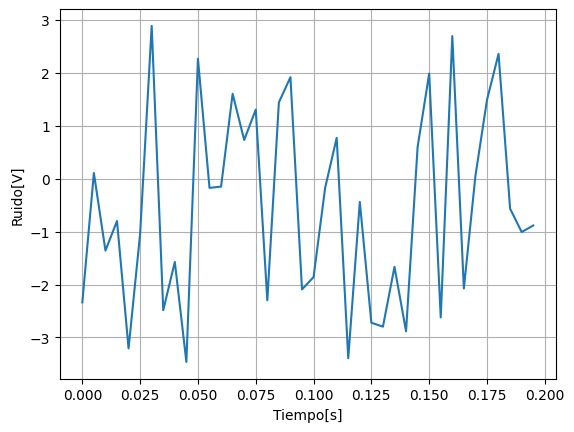

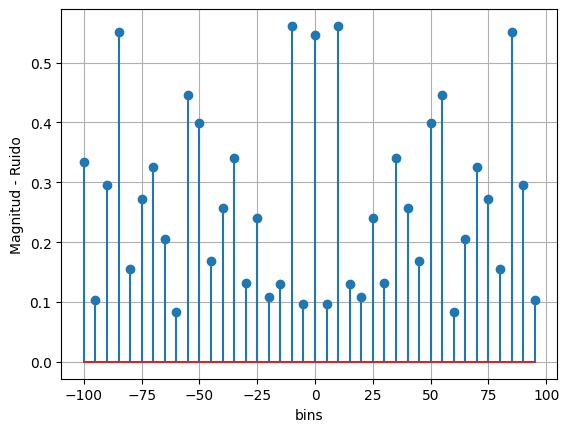

In [8]:
## Repetimos para un ruido uniforme de varianza 4

var = 4                 # Var = (b-a)**2/12
b =  np.sqrt(var*12)/2          # b = -a
n = 2*b*np.random.random_sample(len(t))-b

plt.figure(5)
plt.xlabel("Tiempo[s]")
plt.ylabel("Ruido[V]")
plt.plot(t,n)
plt.grid()

Nf = DFT(n)
Nf_n = Nf/N
## Acomodamos las muestras para centrar en f=0
Nf_n = np.fft.fftshift(Nf_n)
## Creamos el vector de frecuencias ordenado, uso estas funciones por simplicidad
## y ahorrarme el cheque de si N es par o impar
Nf_freqs = np.fft.fftfreq(N,1/fs)
Nf_freqs = np.fft.fftshift(Nf_freqs)

plt.figure(6)
plt.stem(Nf_freqs,abs(Nf_n))
plt.xlabel("bins")
plt.ylabel("Magnitud - Ruido")
plt.grid()

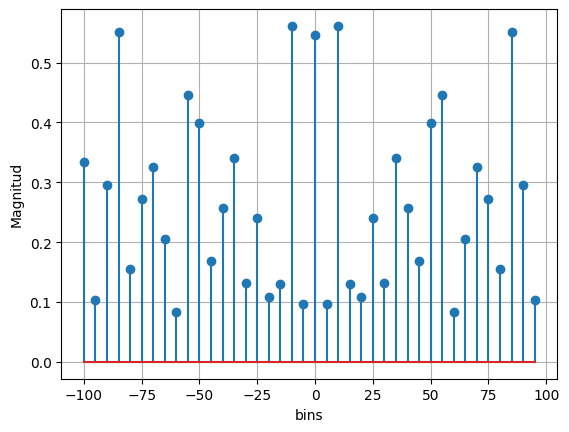

In [9]:
Nf_fft = np.fft.fft(n)
Nf_fft_n = Nf_fft/N
## Acomodamos las muestras para centrar en f=0
Nf_fft_n = np.fft.fftshift(Nf_fft_n)
## Creamos el vector de frecuencias ordenado, uso estas funciones por simplicidad
## y ahorrarme el cheque de si N es par o impar
Nf_fft_freqs = np.fft.fftfreq(N,1/fs)
Nf_fft_freqs = np.fft.fftshift(Nf_fft_freqs)
plt.figure(7)
plt.stem(Nf_fft_freqs,abs(Nf_fft_n))
plt.xlabel("bins")
plt.ylabel("Magnitud")
plt.grid()


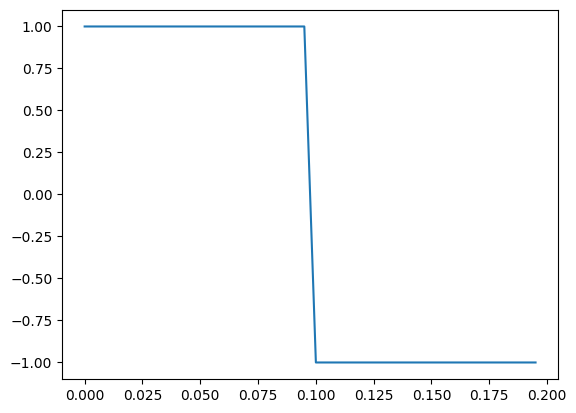

In [12]:
## Para terminar, pruebo mi FFT con una senal cuadrada

Vp = 1          # Valor pico de la senal
Vdc = 0         # Offset de la senal cuadrada
fs = 200        # Frecuencia de sampleo
f = 5           # Frecuencia de la senal
N = int(fs/f)   # Numero de muestras, resolucion espectral igual a f
fase = 0        # Fase de la senal


[t,x] = signal_gen(Vp, Vdc, f, fase, N, fs, tipo = 'cuadrada')
plt.plot(t,x)

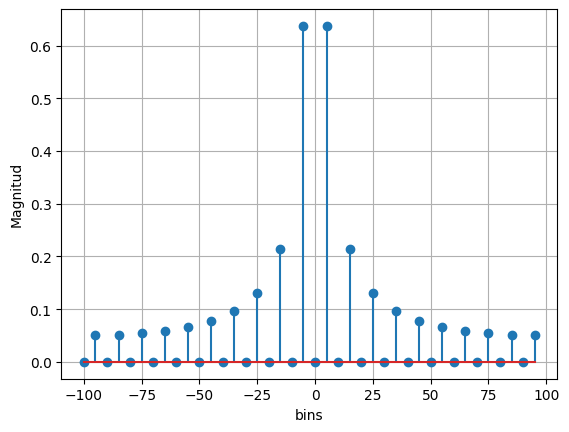

In [15]:
## Hacemos la primer prueba de nuestra DFT con nuestra senoidal

Xf = DFT(x)
Xf_n = Xf/N
## Acomodamos las muestras para centrar en f=0
Xf_n = np.fft.fftshift(Xf_n)
## Creamos el vector de frecuencias ordenado, uso estas funciones por simplicidad
## y ahorrarme el chequeo de si N es par o impar
Xf_freqs = np.fft.fftfreq(N,1/fs)
Xf_freqs = np.fft.fftshift(Xf_freqs)

plt.figure(1)
plt.stem(Xf_freqs,abs(Xf_n))
plt.xlabel("bins")
plt.ylabel("Magnitud")
plt.grid()



Como vemos, nuestra funcion obtiene los mismos resultados que la FFT de Numpy, por lo que consideramos el algoritmo correcto.